In [232]:
# Load libraries
import seaborn
import pandas
from sklearn import tree
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score


In [233]:
dataset = pandas.read_csv("unplugged.csv")
dataset.sample(frac=1)
dataset = dataset[0:360]
del dataset['Comments']


In [234]:
print(dataset.head(5))

  School Name Student Name  Age Gender Results_Before Results_After  Class
0   IMSJ G9-2       Anthny   12      M              F             F      4
1   IMSJ G9-2  Farhana Ali   10      F              F             F      4
2   IMSJ G9-2    Samiullah   10      M              F             F      4
3   IMSJ G9-2        Uzair   12      M              F             F      4
4   IMSJ G9-2        Sarim    8      M              P             P      4


In [235]:
print(dataset.shape)

(360, 7)


In [236]:
# dataset = dataset.drop('Id',axis=1)

In [237]:



gender = {'M': 1, 'F': 2}
dataset.Gender = [gender[item] for item in dataset.Gender]

# after = {'F': 0, 'P': 1}
# dataset.Results_After   = [after[item] for item in dataset.Results_After]
print(dataset.describe())

dataset =  dataset[['Age', 'Gender', 'Class', 'Results_After']]

              Age      Gender       Class
count  360.000000  360.000000  360.000000
mean     9.616667    1.630556    4.052778
std      1.287502    0.483326    0.619995
min      7.000000    1.000000    3.000000
25%      9.000000    1.000000    4.000000
50%     10.000000    2.000000    4.000000
75%     10.000000    2.000000    4.000000
max     14.000000    2.000000    5.000000


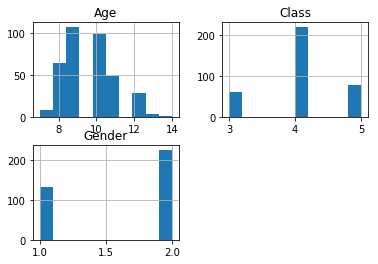

In [238]:
dataset.hist()
plt.show()

In [239]:
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:3]
Y = array[:,3:]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, 
random_state=seed)

In [240]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
models = []

models.append(('DT', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []

In [241]:
import sklearn
for name, model in models:
	kfold = sklearn.model_selection.KFold(n_splits=10,shuffle=False, random_state=None)
	cv_results = sklearn.model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

DT: 0.708621 (0.066937)


In [242]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.7361111111111112


In [243]:
print(confusion_matrix(Y_validation, predictions))

[[ 2 17]
 [ 2 51]]


In [244]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           F       0.50      0.11      0.17        19
           P       0.75      0.96      0.84        53

   micro avg       0.74      0.74      0.74        72
   macro avg       0.62      0.53      0.51        72
weighted avg       0.68      0.74      0.67        72



In [245]:
#Precision
precision = precision_score((Y_validation), predictions, average='micro')
print("Precision", str(precision))

#recall
recall = recall_score((Y_validation), predictions, average='micro')
print("Recall : ", str(recall))

#f-score
f_score = f1_score((Y_validation), predictions, average='micro')
print("F Score : " + str(f_score))


Precision 0.7361111111111112
Recall :  0.7361111111111112
F Score : 0.7361111111111113


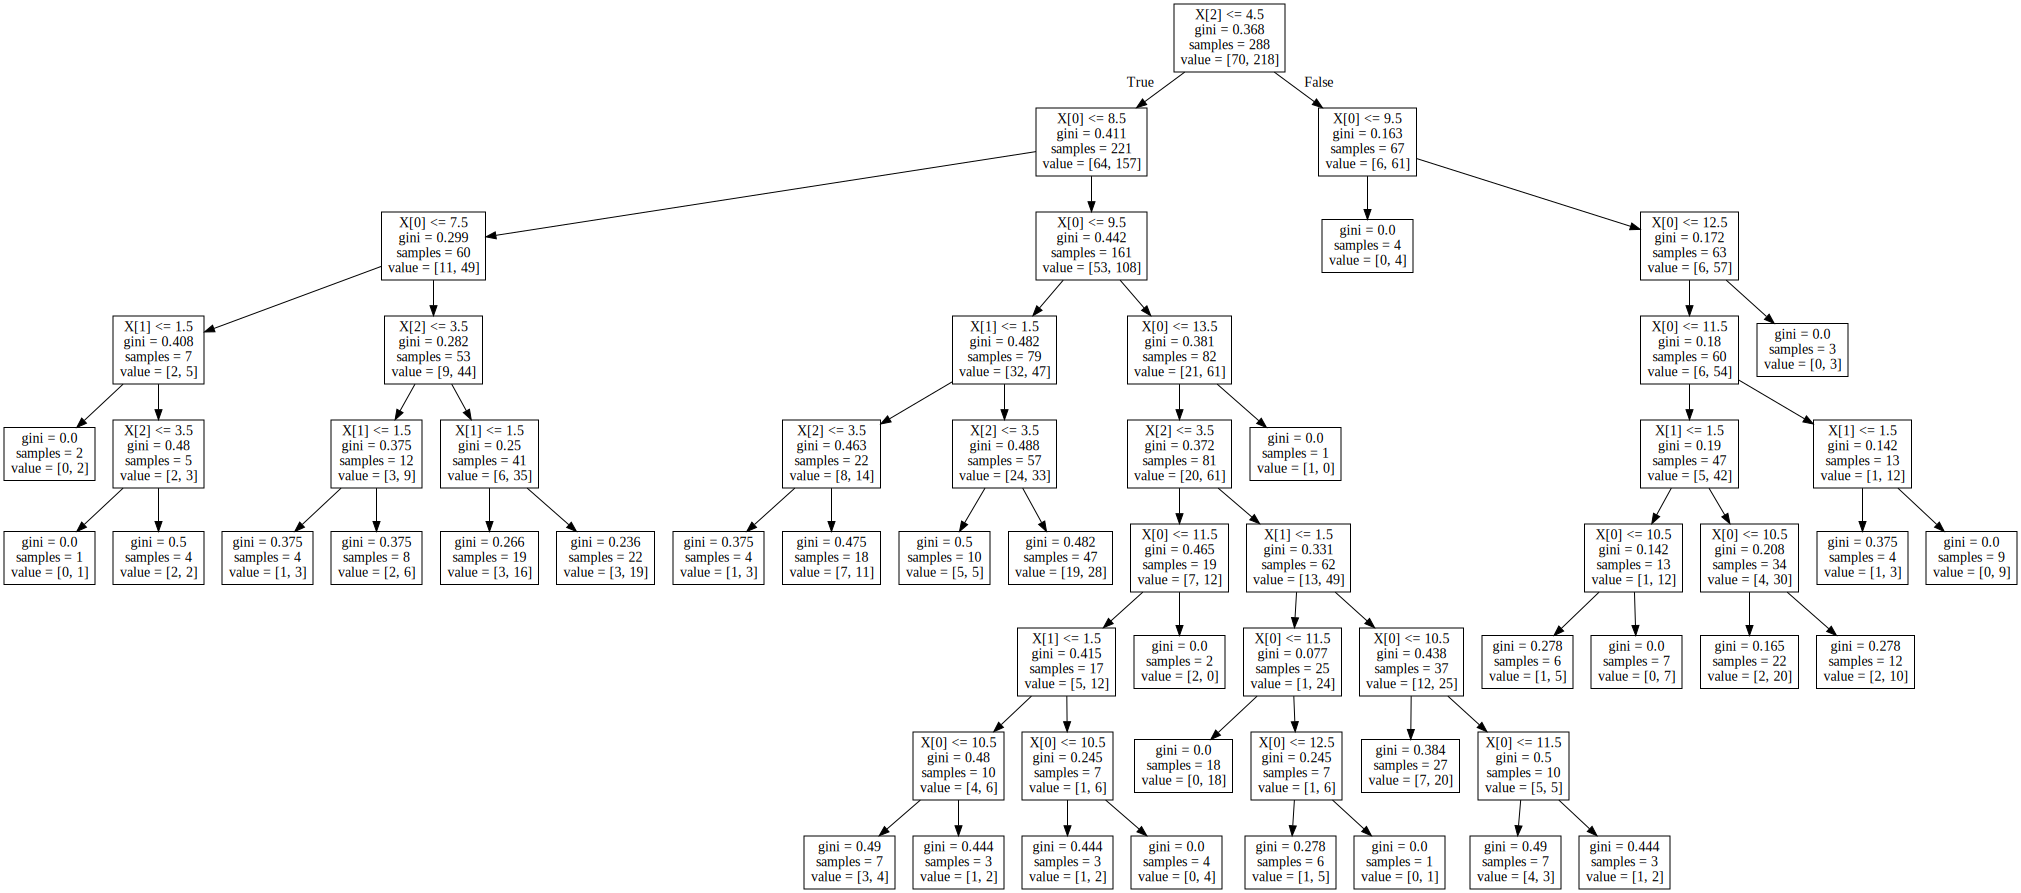

In [246]:

dot_data = tree.export_graphviz(clf, out_file=None,
#                      feature_names=vectorizer.get_feature_names(),
                     class_names=["0", "1"],
                     filled=True, rounded=True,
                     special_characters=True)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("lol_1111")
graph